# Assignement 8B

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ExternalFilesFolder=r"C:\Users\Alessia\Documents\Primo_anno_en\Building\python4ScientificComputing_Numpy_Pandas_MATPLotLIB\ExternalFiles"
TemperatureFileName="Austin_weather_2014.csv"
IrraditionFileName= "irradiance_2014_gen.csv"
ConsumptionFileName="consumption_5545.csv"

path_consumptionFile=os.path.join(ExternalFilesFolder,ConsumptionFileName)
path_temperatureFile=os.path.join(ExternalFilesFolder,TemperatureFileName)
path_irradiationFile=os.path.join(ExternalFilesFolder,IrraditionFileName)



### Importing Consumption file and plotting it

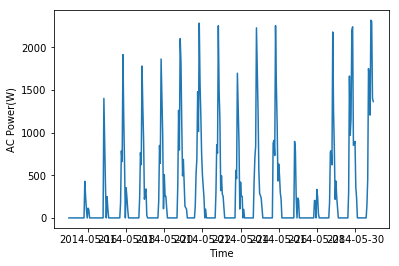

In [2]:
DF_consumption=pd.read_csv(path_consumptionFile,sep=",",index_col=0)


PreviousIndex=DF_consumption.index
NewParsedIndex=pd.to_datetime(PreviousIndex)  #change dtype in datetime from object
DF_consumption.index=NewParsedIndex

DF_consumption_someDaysInMay=DF_consumption["2014-05-15 00:00:00":"2014-05-30 23:00:00"]

plt.figure()
plt.plot(DF_consumption_someDaysInMay)
plt.xlabel("Time")
plt.ylabel("AC Power(W)")
plt.show()


### Importing temperature data and plotting it

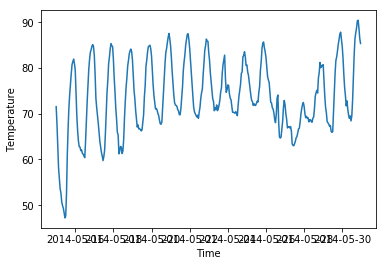

In [3]:
DF_weather=pd.read_csv(path_temperatureFile,sep=";",index_col=0)  
DF_weather.head(24)

PreviousIndex_weather=DF_weather.index
NewParsedIndex_weather=pd.to_datetime(PreviousIndex_weather)  
DF_weather.index=NewParsedIndex_weather

DF_weather_someDaysInMay=DF_weather["2014-05-15 00:00:00":"2014-05-30 23:00:00"]

DF_weather.columns
Series_Temperature=DF_weather_someDaysInMay["temperature"]

DF_Temperature=DF_weather_someDaysInMay[["temperature"]]

plt.figure()
plt.plot(DF_Temperature)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

### Importing irradiance data and plotting it

C:\Users\Alessia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Alessia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2346: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Alessia\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

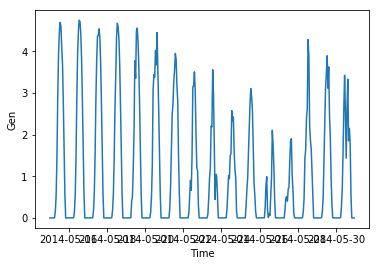

In [4]:
DF_irradiancesSource=pd.read_csv(path_irradiationFile,sep=";",index_col=1)  #time is second column

DF_irradiances=DF_irradiancesSource[["gen"]]


DF_irradiances["gen"]<0   
DF_irradiances[DF_irradiances["gen"]<0]=0   #remove negative values
PreviousIndexx=DF_irradiances.index
NewParsedIndexx=pd.to_datetime(PreviousIndexx)  #change dtype in datetime from object
DF_irradiances.index=NewParsedIndexx

DF_irradiances_someDaysInMay=DF_irradiances["2014-05-15 00:00:00":"2014-05-30 23:00:00"]
plt.figure()
plt.plot(DF_irradiances_someDaysInMay)
plt.xlabel("Time")
plt.ylabel("Gen")
plt.show()


### Plotting togheter the graphs,but first we have to normalize the values of temperature,irradiance and consumptions

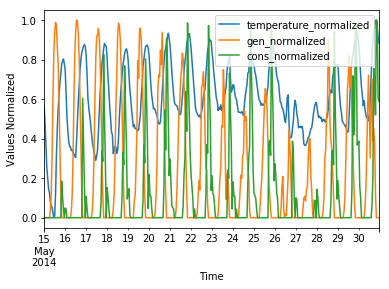

In [5]:
DF_joined=DF_consumption_someDaysInMay.join([DF_Temperature,DF_irradiances_someDaysInMay])

DF_joined.cleaned=DF_joined.dropna()   

temp_min=DF_joined.cleaned["temperature"].min() #show me the min temperature
temp_max=DF_joined.cleaned["temperature"].max() #show me the max temperature
DF_joined.cleaned["temperature_normalized"]=(DF_joined.cleaned["temperature"]-temp_min)/(temp_max-temp_min) #new column with normalized value

gen_min=DF_joined.cleaned["gen"].min() #show me the min gen
gen_max=DF_joined.cleaned["gen"].max() #show me the max gen
DF_joined.cleaned["gen_normalized"]=(DF_joined.cleaned["gen"]-gen_min)/(gen_max-gen_min) #new column with normalized value

cons_min=DF_joined.cleaned["air conditioner_5545"].min() #show me the min cons
cons_max=DF_joined.cleaned["air conditioner_5545"].max() #show me the max cons
DF_joined.cleaned["cons_normalized"]=(DF_joined.cleaned["air conditioner_5545"]-cons_min)/(cons_max-cons_min) #new column with normalized value

plt.figure()
DF_joined.cleaned["temperature_normalized"].plot()
DF_joined.cleaned["gen_normalized"].plot()
DF_joined.cleaned["cons_normalized"].plot()
plt.xlabel("Time")
plt.ylabel("Values Normalized")
plt.legend()
plt.show()